In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from intersect_detection import get_bounding_boxes

from ultralytics import YOLO

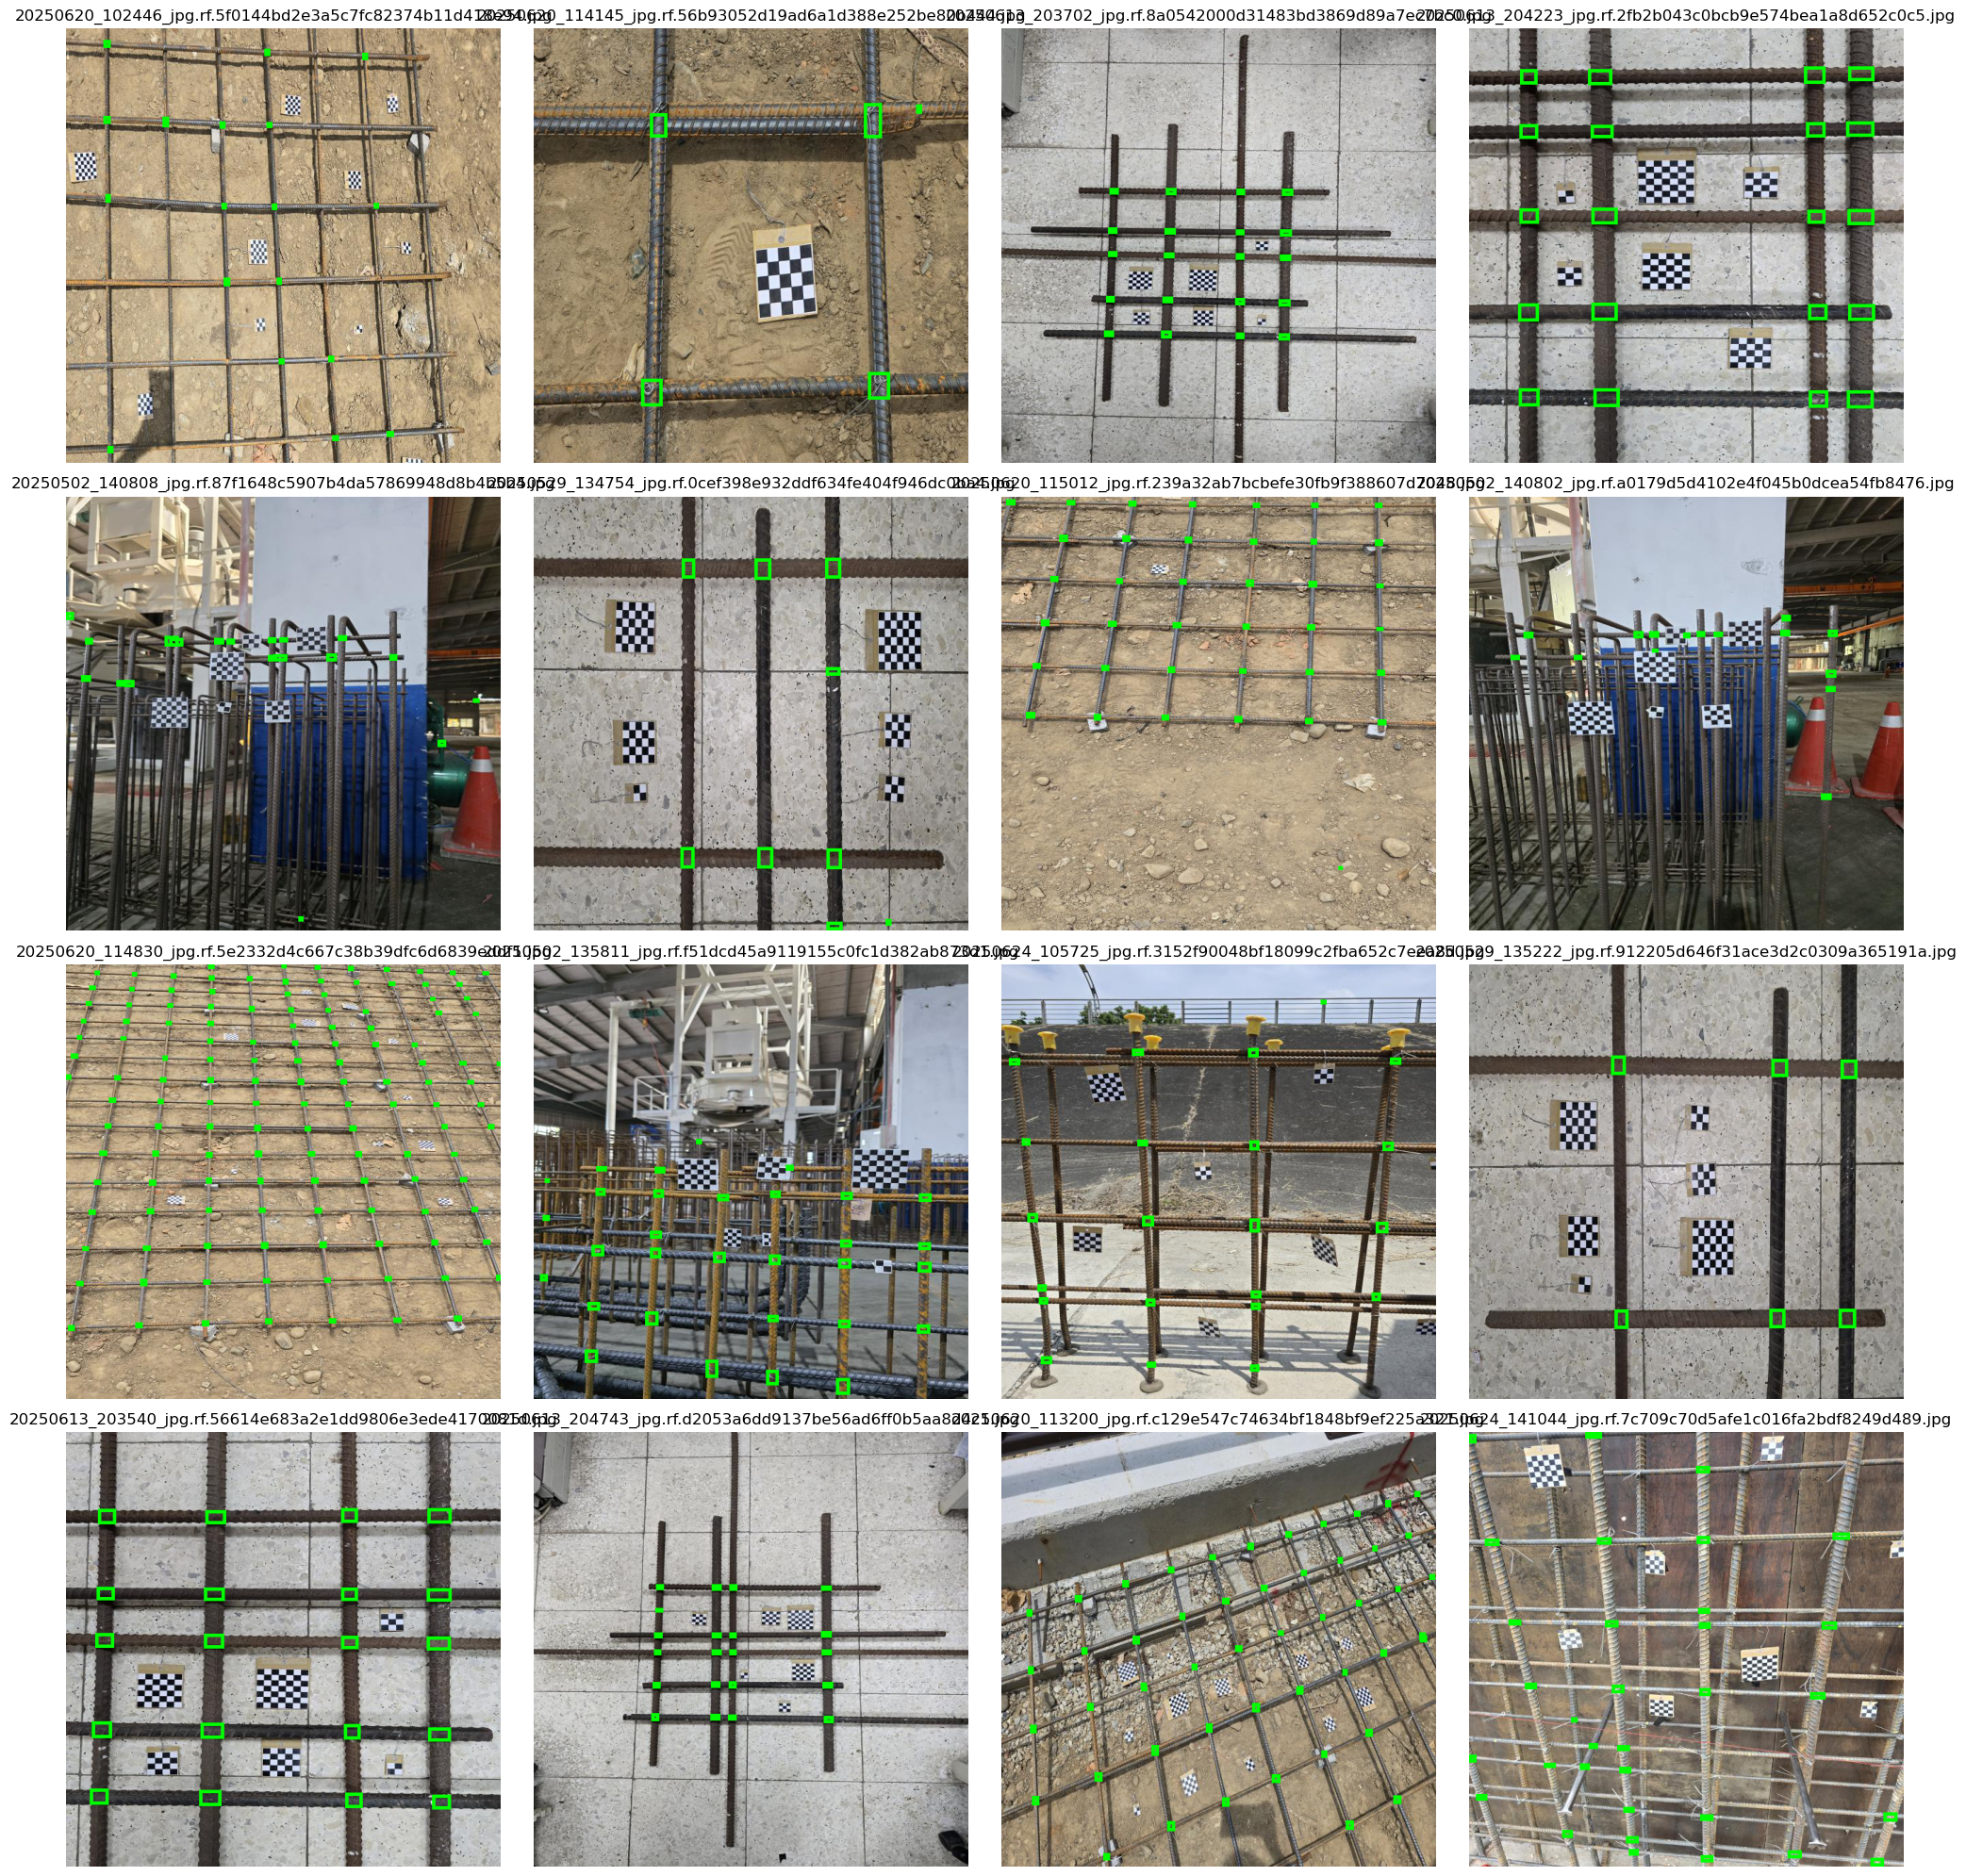

In [5]:
# Define path to your images
image_folder = "data/test/images"  
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Calculate grid size for all images
num_images = len(image_files)
cols = 4  # 4 columns
rows = (num_images + cols - 1) // cols  # Calculate rows needed

# Process and display results
fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))

# Handle case where we have only one row
if rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

model_path = "runs/detect/tune/weights/best.pt"

for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)
    draw = ImageDraw.Draw(image)

    bounding_boxes = get_bounding_boxes(image_path, model_path)
    for box in bounding_boxes:
        draw.rectangle(box, outline="lime", width=5)
    
    # Display
    axes[i].imshow(image)
    axes[i].set_title(f"{image_file}")
    axes[i].axis('off')

# Hide unused subplots
for i in range(num_images, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [66]:
model = YOLO('runs/detect/tune/weights/best.pt')
result = model.val(data='data/data.yaml', split='test')

Ultralytics 8.3.173 🚀 Python-3.12.7 torch-2.7.1 CPU (Apple M1)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 402.2±100.4 MB/s, size: 93.2 KB)


val: Scanning /Users/Lab/rebar-works/yolo-intersect-detection/data/test/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.09s/it]


                   all         16        485      0.818      0.666       0.74      0.309
Speed: 1.2ms preprocess, 181.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
